

# Project: Investigate a Dataset (Medical Appointments No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   **The aim of this project** to investigate a dataset of appointment records for Brasil public hospitals to predict whether a patient is going or not to show up to their scheduled medical appointment?. The dataset has various attributes about the patient are included such as gender and age as well as each individual's primary health designation(s) such as Hypertension, Alcoholism, and Diabetes. There is information around the hospital neighborhood the day of the appointment was scheduled on, and the day the appointment was scheduled for. Also, there is information on whether or not the patient received an SMS text about their appointment.

This is an exploratory data analysis to understand the relationship between the different attributes to keeping or missing an appointment. This analysis is strictly descriptive statistics that predictive analytics does not include hypothesis test, regression analysis or etc.  is out of the scope of this project. The questions to be investigated 
* **Q1:** What is the age distribution of the patient of shows versus no-shows??
* **Q2:** What is the distribution of the patient's health designation of shows versus no-shows??
* **Q3:** Which neighborhoods have the highest number of no-shows?
* **Q4:** What is the breakdown of shows versus no-shows by patients that received SMS reminders?
* **Q5:** Do no-shows have a larger timeframe between schedule date and appointment date?
* **Q6:** Do appointment no-shows occur on specific days of the week?
* **Q7:** Are there any trends in appointment shows versus no-shows over time?


<a id='wrangling'></a>
## Data Wrangling


**Step 1: Import data analysis packages**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Step 2: Load data into the Jupyter notebook**

In [2]:
# Load data to a dataframe
df = pd.read_csv("KaggleV2-May-2016.csv")
# Learn the size of the dataset
df.shape

(110527, 14)

The dataset has 110527 records and 14 columns.

**Step 3: Check if there is any naming or datatype inconsistency in the dataset**

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Observations:** 
* Change the name of the column using underscores will make easier to read and work with it
* Change column misspellings will make columns easier to read and work with it

**Step 4: Integrity check if there is any NULL data in the dataset and types of attributes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Observations / Changes Required:**
* There is no any missing values (NaNs) in the dataset.
* Change patientID datatype from float to int will make the dataset easier to handle with it
* Change the schedule_day and appointment_day datatype to datetime will make the dataset easier to handle with it


**Step 5: Integrity check if there is any duplicate data in the dataset**

In [5]:
df.duplicated().sum()

0

There is no duplicate data exists.

#### Descriptive summary to attributes in the dataset 

In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Observations:**
* Minimum age seems -1. Any such patient will be assumed to be a newborn or infant.

In [7]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


<a id='cleaning'></a>

## Data Cleaning


**Step 1: Fixed the names of the columns misspellings, incorporated underscores**

In [8]:
new_labels = ['patientID', 'appointmentID', 'gender', 'schedule_day', 'appointment_day', 'age',
              'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
              'sms_received', 'no_show']
df.columns = new_labels
df.head(5)

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Step 2: Change patiendID datatype from float to int**

In [9]:
df['patientID'] = df['patientID'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null int64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


**Step 3: Change schedule_day column and appointment_day datatype to datetime**

In [10]:
df['schedule_day'] = pd.to_datetime(df['schedule_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientID          110527 non-null int64
appointmentID      110527 non-null int64
gender             110527 non-null object
schedule_day       110527 non-null datetime64[ns, UTC]
appointment_day    110527 non-null datetime64[ns, UTC]
age                110527 non-null int64
neighborhood       110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns, UTC](2), int64(9), object(3)
memory usage: 11.8+ MB


**Step 4: Create a schedule_dow and a appointment_dow column for day of week to analysis**
* check datetype of schedule_day & appointment_day is datetime or not that enable datetime functions. 
* Convert date to day of week for report readability.

In [11]:
print(df['schedule_day'].dtype)
print(df['appointment_day'].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


In [12]:
df['schedule_dow'] = df['schedule_day'].dt.weekday_name
df['appointment_dow'] = df['appointment_day'].dt.weekday_name
df.head()

,patientID,appointmentID,gender,schedule_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,schedule_dow,appointment_dow
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Friday
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Friday
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Friday
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Friday


**Step 5: Transform the datatype of the no_show field to integer**
###### Convert no_show field from string to int that mean it can be plotted in chart
* 0 = Showed up to the appointment
* 1 = Did not show up to the appointment

In [13]:
df['no_show'].replace("No", 0,inplace=True)
df['no_show'].replace("Yes", 1,inplace=True)
df['no_show'] = df['no_show'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis

### Dataframes for reuse throughout analyses



**Dataframe 1: Create a new column to store waiting time between scheduling and an appointment**


Creating a derived column of waiting time between schedule and appointment dates

In [14]:
df['elapsed_days'] = df['appointment_day'] - df['schedule_day']

**Dataframe 2: Create a dataframe to hold all no-show records**


Createa reusable dataframe of all no-show records

In [15]:
no_shows = df.query('no_show == "1"')
total_no_shows = no_shows.shape[0]
total_appointment = df.shape[0]
proportion_nos = total_no_shows / total_appointment

days = no_shows['elapsed_days'].mean()
timeframe_nos = days / np.timedelta64(1,'D')

**Dataframe 3: Create a dataframe to hold all show records**


In [16]:
shows = df.query('no_show == "0"')
total_shows = shows.shape[0]
proportion_shows = total_shows / total_appointment

days = shows['elapsed_days'].mean()
timeframe_shows = days / np.timedelta64(1,'D')

In [17]:
df.corr()

,patientID,appointmentID,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
patientID,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749,-0.001461
appointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618,-0.162602
age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643,-0.060319
scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
hypertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
handicap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
sms_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
no_show,-0.001461,-0.162602,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


### Finding

The chart to visual distribution of appointment show status

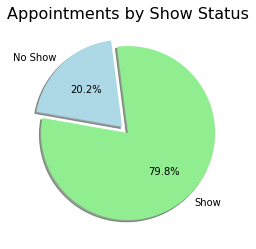

In [18]:
# The chart to Visual distribution of appointment show status
labels = ['Show', 'No Show']
sizes = [proportion_shows, proportion_nos]
colors = ['lightgreen', 'lightblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=170)

plt.title('Appointments by Show Status', fontsize=16)
fig = plt.gcf()

***Q1:* What is the age distribution of the patient of shows versus no-shows?**

To identify the potential influencers of appointment no-shows and age

In [19]:
age_df_nos = no_shows['age'].mean()
age_df_nos

34.31766656212196

In [20]:
age_df_shows = shows['age'].mean()
age_df_shows

37.790064393252315

In [21]:
# Data to plot

age_df_nos = no_shows['age']
age_df_shows = shows['age']

**The chart to visual distribution of age for all no-shows appointments**

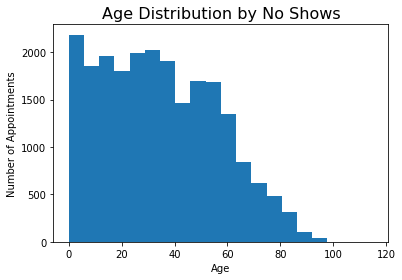

In [45]:
# The plot to visual distribution of age for all no-shows appointments

plt.hist(age_df_nos, stacked=True, bins=20)
plt.title('Age Distribution by No Shows',fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

**The chart to visual distribution of age for all shows appointments**


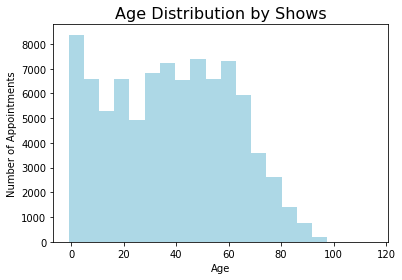

In [23]:
# The plot to visual distribution of age for all shows
plt.hist(age_df_shows, stacked=True, bins=20, color='lightblue')
plt.title('Age Distribution by Shows',fontsize=16)
plt.xlabel('Age')
plt.ylabel('Number of Appointments');

***Q2:* What is the patient health designation breakdown of no-shows versus shows?**

To identify the potential influencers of appointment no-shows and health designation

In [24]:
# Total No-Shows appointments
nos_by_health = (no_shows.iloc[8] == 1) & (no_shows.iloc[9] == 1) & (no_shows.iloc[10] == 1) & (no_shows.iloc[11] == 1)
total_nos = nos_by_health.shape[0]

# Total Shows appointments
shows_by_health = (shows.iloc[8] == 1) & (shows.iloc[9] == 1) & (shows.iloc[10] == 1) & (shows.iloc[11] == 1)
total_shows = shows_by_health.shape[0]

# Total Hypertension
df_hyp = no_shows.query('hypertension == "1"')
dfa = df_hyp.shape[0]

# Proportion Hypertension
a = dfa / total_nos

# Total Diabetes
df_dia = no_shows.query('diabetes == "1"')
dfb = df_dia.shape[0]

# Proportion Diabetes
b = dfb / total_nos

# Total Alcoholism
df_alc = no_shows.query('alcoholism == "1"')
dfc = df_alc.shape[0]

# Proportion Alcoholism
c = dfc / total_nos

# Total Handicap
df_han = no_shows.query('handicap == "1"')
dfd = df_han.shape[0]

# Proportion Handicap
d = dfd / total_nos

**The chart to visual distribution of health designations for all no-shows**

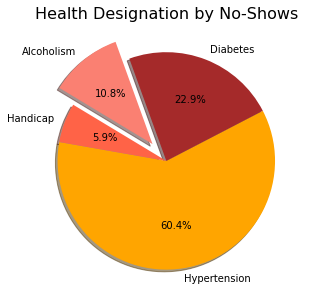

In [25]:
# The plot to visual distribution of health designations for all no-shows
labels = ['Hypertension','Diabetes','Alcoholism', 'Handicap']
sizes = [a, b, c, d]
colors = ['orange', 'brown', 'salmon', 'tomato']
explode = (0, 0, 0.2, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=170)

plt.title('Health Designation by No-Shows',fontsize=16)
fig = plt.gcf()
fig.set_size_inches(7,5);

In [26]:

# Total Hypertension
df_hyp2 = shows.query('hypertension == "1"')
dfa2 = df_hyp2.shape[0]

# Proportion Hypertension
a2 = dfa2 / total_shows

# Total Diabetes
df_dia2 = shows.query('diabetes == "1"')
dfb2 = df_dia2.shape[0]

# Proportion Diabetes
b2 = dfb2 / total_shows

# Total Alcoholism
df_alc2 = shows.query('alcoholism == "1"')
dfc2 = df_alc2.shape[0]

# Proportion Alcoholism
c2 = dfc2 / total_shows

# Total Handicap
df_han2 = shows.query('handicap == "1"')
dfd2 = df_han2.shape[0]

# Proportion Handicap
d2 = dfd2 / total_shows

**The chart to visual distribution of health designations for all shows**

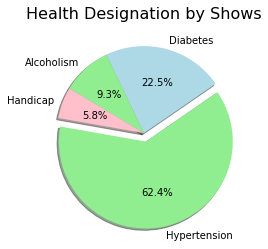

In [27]:
# The plot to visual distribution of health designations for all shows
labels = ['Hypertension','Diabetes','Alcoholism', 'Handicap']
sizes = [a2, b2, c2, d2]
colors = ['lightgreen', 'lightblue', 'lightgreen', 'pink']
explode = (0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=170)

plt.title('Health Designation by Shows' , fontsize=16)
fig = plt.gcf()

***Q3*: Which neighborhoods have the highest number of no-shows?**

To identify the potential influencers of appointment no-shows and geography

Top 5 neighborhoods by no-shows 

In [28]:
nos_by_hood = no_shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
nos_by_hood.head(5)

,neighborhood,count
38,JARDIM CAMBURI,1465
43,MARIA ORTIZ,1219
36,ITARARÉ,923
58,RESISTÊNCIA,906
10,CENTRO,703


**Top 5 neighborhoods by shows**

In [29]:
shows_by_hood = shows.groupby("neighborhood")["no_show"].count().reset_index(name="count").sort_values("count", ascending=False)
shows_by_hood.head(5)

,neighborhood,count
37,JARDIM CAMBURI,6252
42,MARIA ORTIZ,4586
58,RESISTÊNCIA,3525
38,JARDIM DA PENHA,3246
65,SANTA MARTHA,2635


***Q4*: What is the breakdown of no-shows versus shows by patients that received SMS reminders?**

To identify the potential influencers of appointment no-shows and appointment reminders


In [30]:
nos_sms_count = no_shows.query('sms_received == 1')
a = nos_sms_count.shape[0]

shows_sms_count = shows.query('sms_received == 1')
b = shows_sms_count.shape[0]

**The chart Visual distribution of appointment status when reminder messages are received**

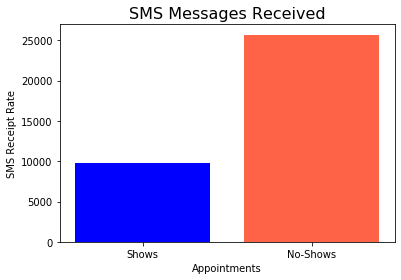

In [31]:
# The plot Visual distribution of appointment status when reminder messages are received

locations = [1, 2]
heights = [a, b]
labels = ['Shows', 'No-Shows']

bar1 = plt.bar(locations, heights, tick_label=labels, color=['blue','tomato'])
plt.title('SMS Messages Received', fontsize=16)
plt.xlabel('Appointments')
plt.ylabel('SMS Receipt Rate');

The plot to visual distribution of appointment status when reminder messages are not received

In [32]:
# Data to plot

nos_sms_count = no_shows.query('sms_received == 0')
c_ct = nos_sms_count.shape[0]

shows_sms_count = shows.query('sms_received == 0')
d_ct = shows_sms_count.shape[0]

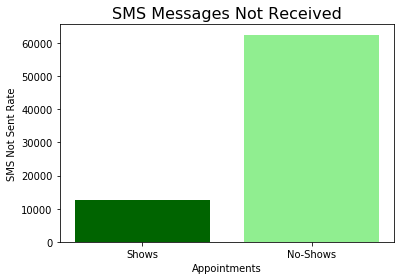

In [33]:
# The plot
locations = [1, 2]
heights = [c_ct, d_ct]
labels = ['Shows', 'No-Shows']

bar2 = plt.bar(locations, heights, tick_label=labels, color=['darkgreen','lightgreen'])
plt.title('SMS Messages Not Received', fontsize=16)
plt.xlabel('Appointments')
plt.ylabel('SMS Not Sent Rate');

***Q5*: Do no-shows have a larger timeframe between schedule date and appointment date?**

To identifying potential influencers of appointment no-shows and time to appointment


**The chart to visual distribution of mean timeframe between scheduling and appointment time**

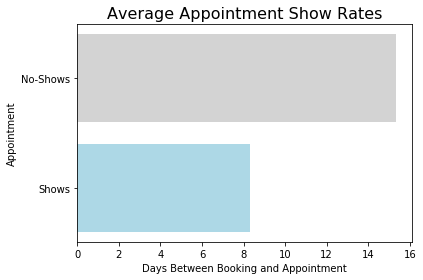

In [34]:
locations = [1, 2]
heights = [timeframe_shows, timeframe_nos]
labels = ['Shows', 'No-Shows']

plt.barh(locations, heights, tick_label=labels, color=['lightblue','lightgrey'])
plt.title('Average Appointment Show Rates', fontsize=16)
plt.xlabel('Days Between Booking and Appointment')
plt.ylabel('Appointment');

***Q6*: Do appointment no-shows occur on specific days of the week?**

To identify the potential influencers of appointment no-shows and appointment day


In [35]:
nos_sun = no_shows.query('appointment_dow == "Sunday"')
nos_sun = nos_sun['appointment_dow'].count()

nos_mon = no_shows.query('appointment_dow == "Monday"')
nos_mon = nos_mon['appointment_dow'].count()

nos_tue = no_shows.query('appointment_dow == "Tuesday"')
nos_tue = nos_tue['appointment_dow'].count()

nos_wed = no_shows.query('appointment_dow == "Wednesday"')
nos_wed = nos_wed['appointment_dow'].count()

nos_thu = no_shows.query('appointment_dow == "Thursday"')
nos_thu = nos_thu['appointment_dow'].count()

nos_fri = no_shows.query('appointment_dow == "Friday"')
nos_fri = nos_fri['appointment_dow'].count()

nos_sat = no_shows.query('appointment_dow == "Saturday"')
nos_sat = nos_sat['appointment_dow'].count()

The chart to visual distribution of no-shows by day of week

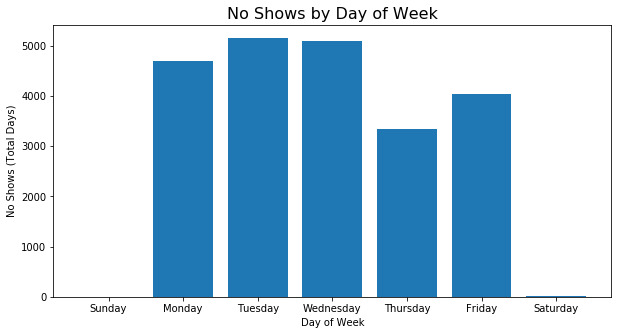

In [36]:
locations = [1, 2, 3, 4, 5, 6, 7]
heights = [nos_sun, nos_mon, nos_tue, nos_wed, nos_thu, nos_fri, nos_sat]
labels = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
plt.bar(locations, heights, tick_label=labels)
plt.title('No Shows by Day of Week', fontsize=16)
plt.xlabel('Day of Week')
plt.ylabel('No Shows (Total Days)')
fig = plt.gcf()
fig.set_size_inches(10,5);

***Q7:* Are there any trends in appointment no-shows versus shows over time?**

In [37]:
# Dataframe with no_show status
line_df = df.groupby(["appointment_day","no_show"])["no_show"].count().reset_index(name="appt_count")
line_df.head()

,appointment_day,no_show,appt_count
0,2016-04-29 00:00:00+00:00,0,2602
1,2016-04-29 00:00:00+00:00,1,633
2,2016-05-02 00:00:00+00:00,0,3515
3,2016-05-02 00:00:00+00:00,1,861
4,2016-05-03 00:00:00+00:00,0,3425


In [38]:
line_df_nos = line_df.query('no_show == "1"')
line_df_nos.groupby("appointment_day").count()
line_df_nos.head()

,appointment_day,no_show,appt_count
1,2016-04-29 00:00:00+00:00,1,633
3,2016-05-02 00:00:00+00:00,1,861
5,2016-05-03 00:00:00+00:00,1,831
7,2016-05-04 00:00:00+00:00,1,973
9,2016-05-05 00:00:00+00:00,1,807


In [39]:
line_df_shows = line_df.query('no_show == "0"')
line_df_shows.groupby("appointment_day").count()
line_df_shows.head()

,appointment_day,no_show,appt_count
0,2016-04-29 00:00:00+00:00,0,2602
2,2016-05-02 00:00:00+00:00,0,3515
4,2016-05-03 00:00:00+00:00,0,3425
6,2016-05-04 00:00:00+00:00,0,3195
8,2016-05-05 00:00:00+00:00,0,3466


In [40]:
line_shows_date = line_df_shows['appointment_day']
line_shows_count = line_df_shows['appt_count']

In [41]:
line_nos_date = line_df_nos['appointment_day']
line_nos_count = line_df_nos['appt_count']

**The chart to visual of no shows vs. shows over time**

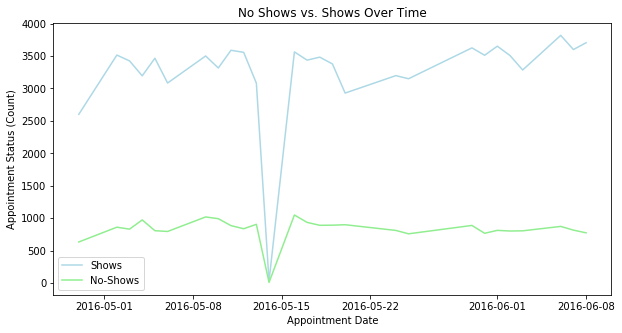

In [42]:
line_shows, = plt.plot(line_shows_date, line_shows_count, color='lightblue', label='Shows')
line_nos, = plt.plot(line_nos_date, line_nos_count, color='lightgreen', label='No-Shows')

plt.title('No Shows vs. Shows Over Time')
plt.xlabel('Appointment Date')
plt.ylabel('Appointment Status (Count)')
plt.legend(handles=[line_shows, line_nos])

fig = plt.gcf()
fig.set_size_inches(10,5);

<a id='conclusions'></a>
## Conclusions

With the exploration and analysis performed above, we can answer the questions raised at the beginning with the limitation:

***limitation***

* The period time of the data set explored in this analysis is six months that not provide longer time frame data insight into the impact of seasonality and holidays on show or no-show rates.
* Currently, analysis is limited to general correlations. There are no overlaying external data sources on this dataset, such as traffic, weather, or geographic data, may allow us to better understand influencers at no-show rates.


***Finding***

* Only 20.2% of patients no-show while 79.8% showed on the day of the appointment. 
* The age of the patient was defined to see if there was a significant difference between show and no-show segments. The average age of the no-show segment was 34 years compared to the show segment which was 38 years old. No significant differences observed.
* The health of the patient was defined to see if there was a significant difference between show and no show segments. Hypertension was the largest group in both segments due to the popularity of the appointment. There is no observed coloration.
* The neighborhood in which the appointment was scheduled was charted to see if some areas were experiencing high attendance rates. JARDIM CAMBURI and MARIA ORTIZ were the Top 2 neighborhoods in both the no-shows and shows segments. This is probably due to the residents of these neighborhoods. It is worth knowing if there is any statistical significance in the rate of lack of no-show in different regions.
* The no-show rate was almost doubled when an SMS was not sent to the patient before the day of the appointment. There is a correlation between SMS messages and the appointment show rate.
* The time frame between the scheduled date and the appointment date was investigated to see if there was any correlation with show rates. The average time frame between schedule date and appointment date in no-show was significantly higher than shows. The show rate is better if the appointment is booked a few days after the appointment date. There is a correlation between the number of exit days and the appointment show rate
* The lack of no-shows occurred on most Tuesday and less Thursday. Overall, appointments early in the week had a higher no-shows rate. It is difficult to draw any conclusions from this but it can be triggered by regression analysis to better understand the other influential type of show rate in the week to which it is associated.
* Appointment shows are increasing at a higher rate than appointment no-shows. Performing a regression analysis can identify factors that affect appointment rates most often.

This exploratory analysis was able to correlate the time between the day of the schedule and the day of the appointment and remind the appointment of higher rates for the appointment. The data should be investigated further through more advanced statistical analysis to reveal new insights and correlations.